# Bank Data (Term Deposit Subscription Prediction)

## Aim

The goal of this dataset is to predict whether  a client will subscribe to a term deposit or not,by building a model using Decision Tree and Random Forest.

## Data Dictionary


Here is the description of all the variables :

age: Age of the client


job: Type of job


marital: Marital status of the client


education: Education level


default: Credit in default.


housing: Housing loan


loan: Personal loan


contact: Type of communication


month: Contact month

balance: balance remaining in the bank


day: Day of week of contact


duration: Contact duration


campaign: number of contacts performed during this campaign to the client


pdays: number of days that passed by after the client was last contacted


previous: number of contacts performed before this campaign


poutcome: outcome of the previous marketing campaign



In [285]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
os.getcwd()

'D:\\Hariharan\\Desktop\\imarticus'

In [287]:
os.chdir(r"D:\Hariharan\Desktop\imarticus")

In [288]:
bank=pd.read_excel("bank.xlsx")

In [289]:
#aim=predict if a client will subscribe to a term deposit,by building a model using Decision Tree

In [290]:
#Call FD people first who can take FD from us then focus on others

In [291]:
#Y-Desired target(Deposit)

In [292]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [293]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [294]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [295]:
#datatypes, missing values, rows, columns

In [296]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [297]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [298]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Univariate Analysis


### Education

In [299]:
bank["education"].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

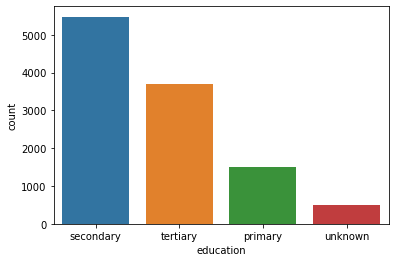

In [300]:
sns.countplot(data=bank, x='education')

### Deposit

In [301]:
bank["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

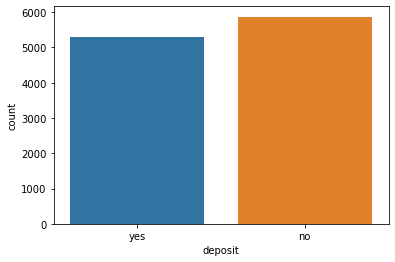

In [302]:
sns.countplot(data=bank, x='deposit')

### Poutcome

In [303]:
bank["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

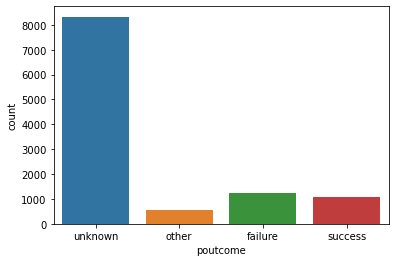

In [304]:
sns.countplot(data=bank, x='poutcome')

### Job

In [305]:
bank["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

## Grouping of job variable

In [306]:
#Housemaid,admin
#student,unemployed,retired,unknown
#Entrepreneurs, self employed
#management,
#blue collar and services
#technician 

In [307]:
bank["job"]=bank["job"].replace(["housemaid", "admin."], "Pink-collar")


In [308]:
bank["job"]=bank["job"].replace(["student", "unemployed","retired","unknown"], "No_income")

In [309]:
bank["job"]=bank["job"].replace(["blue-collar", "services"], "Blue Collar")

In [310]:
bank["job"]=bank["job"].replace(["entrepreneur", "self-employed","technician"], "Independant")

In [311]:
bank["job"]=bank["job"].replace(["management"], "Management")

In [312]:
bank["job"].value_counts()

Blue Collar    2867
Management     2566
Independant    2556
Pink-collar    1608
No_income      1565
Name: job, dtype: int64

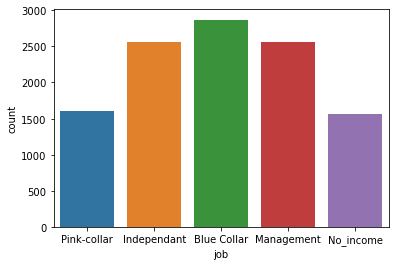

In [313]:
sns.countplot(data=bank, x='job')

### Marital

In [314]:
bank["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

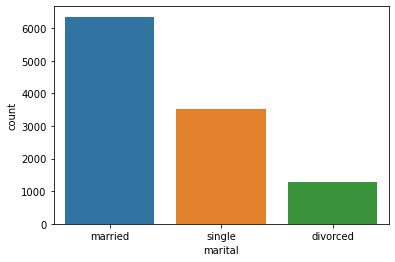

In [315]:
sns.countplot(data=bank, x='marital')

### Contact

In [316]:
bank["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

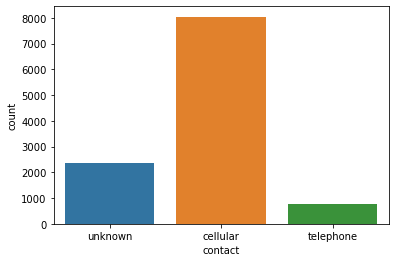

In [317]:
sns.countplot(data=bank, x='contact')

## Month

In [318]:
bank["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

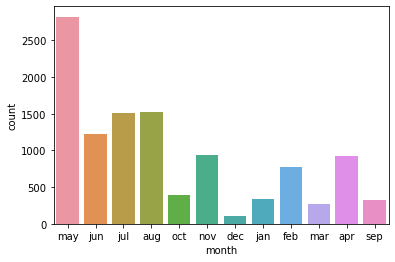

In [319]:
sns.countplot(data=bank, x='month')

# EDA

In [320]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

## Deposit and Age

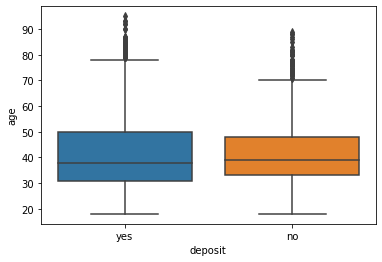

In [321]:
sns.boxplot(data=bank, x='deposit', y='age')

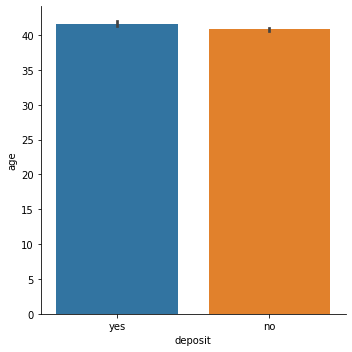

In [322]:
sns.catplot(x="deposit", y="age", kind='bar',data=bank)

We can see from the graphs that the yes and no categories in the deposit variable show the similar heights in the graph.So no major impact
is observed.


## Deposit and Marital

In [323]:
pd.crosstab(bank['marital'], bank['deposit'])

deposit,no,yes
marital,,
divorced,671,622
married,3596,2755
single,1606,1912


In [324]:
marital = pd.crosstab(bank['marital'], bank['deposit'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

deposit,no,yes
marital,,
divorced,0.518948,0.481052
married,0.566210,0.433790
single,0.456509,0.543491


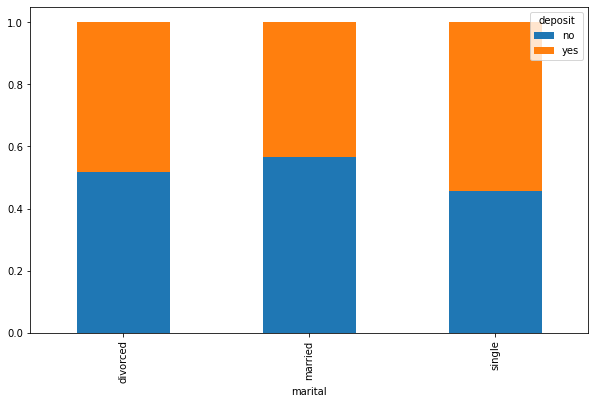

In [325]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

Among all the three categories, in this variable single people have the largest tendency to subscribe for a term deposit as compared to other categories.


## Default and Deposit

In [326]:
pd.crosstab(bank["default"],bank["deposit"])

deposit,no,yes
default,,
no,5757,5237
yes,116,52


In [327]:
d = pd.crosstab(bank['default'], bank['deposit'])
d_norm = d.div(d.sum(1).astype(float), axis=0)
d_norm

deposit,no,yes
default,,
no,0.523649,0.476351
yes,0.690476,0.309524


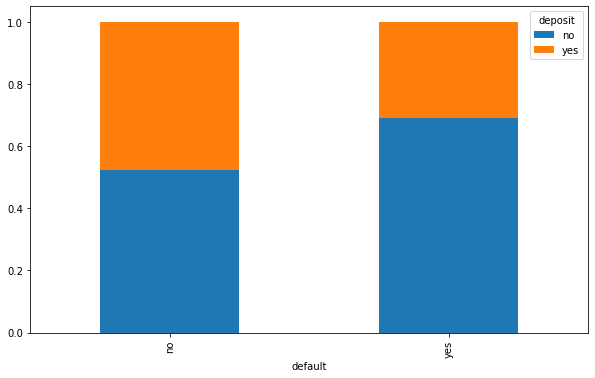

In [328]:
d_norm.plot.bar(stacked=True, figsize=(10,6));

We can infer that clients having no previous default have a higher chance of taking a term deposit as compared to those having a 
previous default history.

## Deposit and education

In [329]:
pd.crosstab(bank['education'], bank['deposit'])

deposit,no,yes
education,,
primary,909,591
secondary,3026,2450
tertiary,1693,1996
unknown,245,252


In [330]:
edu = pd.crosstab(bank['education'], bank['deposit'])
edu_norm = edu.div(edu.sum(1).astype(float), axis=0)
edu_norm

deposit,no,yes
education,,
primary,0.606000,0.394000
secondary,0.552593,0.447407
tertiary,0.458932,0.541068
unknown,0.492958,0.507042


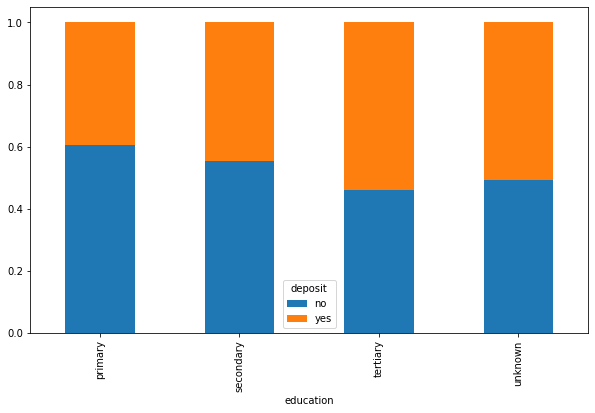

In [331]:
edu_norm.plot.bar(stacked=True, figsize=(10,6));

Tertiary level of education refers to masters or PHD level of education and so according to this grpah, these people are more likely to subscribe for a term deposit.

## Job and deposit

In [332]:
pd.crosstab(bank["job"],bank["deposit"])

deposit,no,yes
job,,
Blue Collar,1790,1077
Independant,1406,1150
Management,1265,1301
No_income,544,1021
Pink-collar,868,740


In [333]:
job = pd.crosstab(bank['job'], bank['deposit'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm

deposit,no,yes
job,,
Blue Collar,0.624346,0.375654
Independant,0.550078,0.449922
Management,0.492985,0.507015
No_income,0.347604,0.652396
Pink-collar,0.539801,0.460199


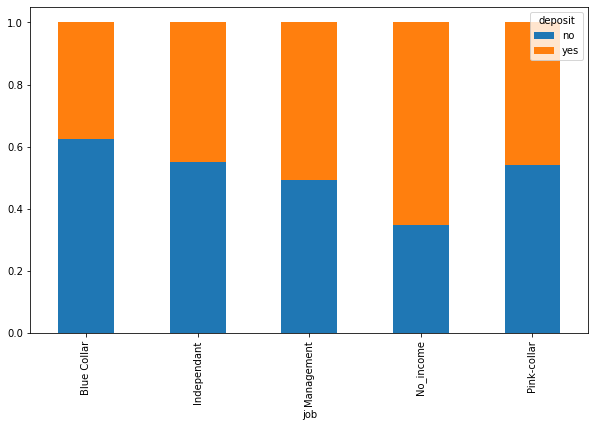

In [334]:
job_norm.plot.bar(stacked=True, figsize=(10,6));

According to the graph, people having no income are more likely to subscribe for a term deposit unlike blue-collar workers(manual labourers, plumbers etc.) who are the least likely to do the same.

## Housing loan and Deposit

In [335]:
pd.crosstab(bank["housing"],bank["deposit"])

deposit,no,yes
housing,,
no,2527,3354
yes,3346,1935


In [336]:
house = pd.crosstab(bank['housing'], bank['deposit'])
house_norm = house.div(house.sum(1).astype(float), axis=0)
house_norm

deposit,no,yes
housing,,
no,0.429689,0.570311
yes,0.633592,0.366408


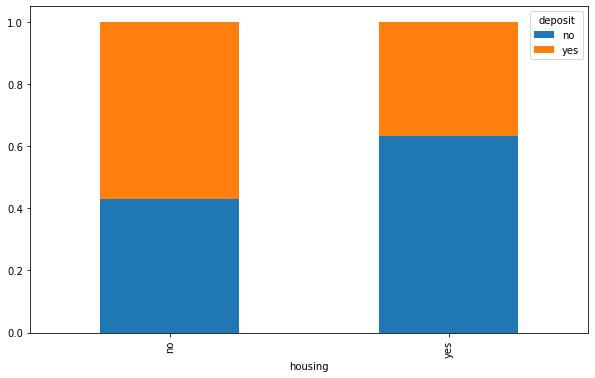

In [337]:
house_norm.plot.bar(stacked=True, figsize=(10,6));

## Month and Deposit

In [338]:
pd.crosstab(bank["month"],bank["deposit"])

deposit,no,yes
month,,
apr,346,577
aug,831,688
dec,10,100
feb,335,441
jan,202,142
jul,887,627
jun,676,546
mar,28,248
may,1899,925


In [339]:
month = pd.crosstab(bank['month'], bank['deposit'])
month_norm = month.div(month.sum(1).astype(float), axis=0)
month_norm

deposit,no,yes
month,,
apr,0.374865,0.625135
aug,0.547070,0.452930
dec,0.090909,0.909091
feb,0.431701,0.568299
jan,0.587209,0.412791
jul,0.585865,0.414135
jun,0.553191,0.446809
mar,0.101449,0.898551
may,0.672450,0.327550


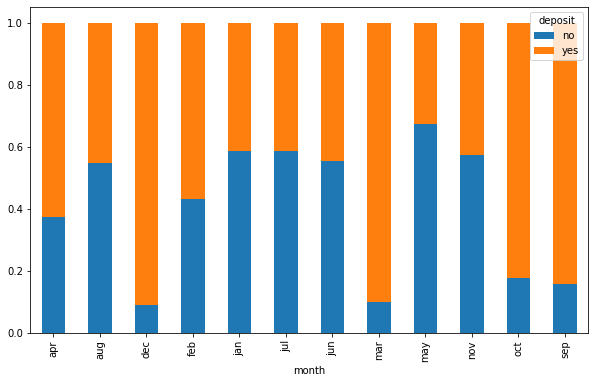

In [340]:
month_norm.plot.bar(stacked=True, figsize=(10,6));

Maximum number of term deposit customers are in the month of March and the least number are seen in the month of May.

## Deposit and Contact

In [341]:
pd.crosstab(bank["contact"],bank["deposit"])

deposit,no,yes
contact,,
cellular,3673,4369
telephone,384,390
unknown,1816,530


In [342]:
contact = pd.crosstab(bank['contact'], bank['deposit'])
contact_norm = contact.div(contact.sum(1).astype(float), axis=0)
contact_norm

deposit,no,yes
contact,,
cellular,0.456727,0.543273
telephone,0.496124,0.503876
unknown,0.774084,0.225916


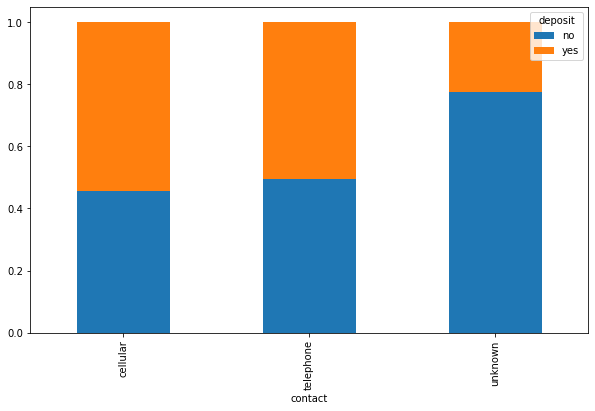

In [343]:
contact_norm.plot.bar(stacked=True, figsize=(10,6));

Customers with cellular type of contact have a higher chance of subscription of term deposit.

## Co-relation Check

In [344]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


### Outlier Check

In [345]:
bank.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,11162.0,41.231948,11.913369,18.0,22.0,24.0,25.0,25.00,26.00,28.0,32.0,39.0,49.00,58.0,61.00,64.00,68.00,72.00,77.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,-522.0,-367.0,-244.0,-147.36,-54.95,0.0,122.0,550.0,1708.00,3897.6,6026.45,6987.48,8090.36,10086.00,13226.98,81204.0
day,11162.0,15.658036,8.420740,1.0,1.0,2.0,2.0,2.00,3.00,4.0,8.0,15.0,22.00,28.0,30.00,30.00,30.00,30.00,31.00,31.0
duration,11162.0,371.993818,347.128386,2.0,14.0,23.0,34.0,44.00,51.00,77.0,138.0,255.0,496.00,838.0,1079.90,1148.00,1236.17,1372.34,1577.17,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,2.0,3.00,5.0,7.00,8.00,8.00,10.00,13.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0,-1.0,20.75,191.0,326.00,343.00,355.00,369.00,425.39,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,1.00,3.0,5.00,5.00,6.00,7.00,10.00,58.0


In [346]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

We divided the numerical variables and object variables in two different datasets.
Bank1 contains all the numerical variables post outlier capping
Bank2 contains all the object variables

In [347]:
def outlier_capping(x):
    x=x.clip(upper=x.quantile(0.99)) #since 99 shows more difference
    
    return x
bank1=bank[["balance","age","duration","day","campaign","pdays","previous"]].apply(lambda x:outlier_capping(x))


In [348]:
bank2=bank[["job","marital","education","default","housing","loan","contact","month","poutcome","deposit"]]

In [349]:
bank2.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

## Bank2 Univariate Analysis

### Default

In [350]:
bank2["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

### Poutcome

In [351]:
bank2["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

### Housing

In [352]:
bank2["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

### Month

In [353]:
bank2["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

### Grouping of month variable into Q1 Q2 Q3

In [354]:
#Q1-jan,feb,march
#Q2-april,may,june
#Q3-july,august,september
#Q4-october,november,december

In [355]:
bank2["month"]=bank2["month"].replace(["jan", "feb","mar"], "Q1")

<ipython-input-355-e653d27a906c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank2["month"]=bank2["month"].replace(["jan", "feb","mar"], "Q1")


In [356]:
bank2["month"]=bank2["month"].replace(["apr", "may","jun"], "Q2")

<ipython-input-356-23eaf8cff896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank2["month"]=bank2["month"].replace(["apr", "may","jun"], "Q2")


In [357]:
bank2["month"]=bank2["month"].replace(["jul", "aug","sep"], "Q3")

<ipython-input-357-32cae9d4f4d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank2["month"]=bank2["month"].replace(["jul", "aug","sep"], "Q3")


In [358]:
bank2["month"]=bank2["month"].replace(["oct", "nov","dec"], "Q4")

<ipython-input-358-cd8060ca1361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank2["month"]=bank2["month"].replace(["oct", "nov","dec"], "Q4")


In [359]:
bank2["month"].value_counts()

Q2    4969
Q3    3352
Q4    1445
Q1    1396
Name: month, dtype: int64

### Loan

In [360]:
bank2["loan"].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

### Replaced unknown category in poutcome with others

In [361]:
bank2["poutcome"]=bank2["poutcome"].replace(["unknown", "other"], "other")

<ipython-input-361-338677bc6d08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank2["poutcome"]=bank2["poutcome"].replace(["unknown", "other"], "other")


In [362]:
bank2["poutcome"].value_counts()

other      8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [363]:
bank2.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

### We put the all the object variables in a different object named bank3 nad created their dummies

In [364]:
bank3=pd.get_dummies(bank2, columns=["job", "marital","default","poutcome","education","housing","loan"], drop_first=True)

In [365]:
bank3.columns

Index(['contact', 'month', 'deposit', 'job_Independant', 'job_Management',
       'job_No_income', 'job_Pink-collar', 'marital_married', 'marital_single',
       'default_yes', 'poutcome_other', 'poutcome_success',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes'],
      dtype='object')

In [366]:
bank3

,contact,month,deposit,job_Independant,job_Management,job_No_income,job_Pink-collar,marital_married,marital_single,default_yes,poutcome_other,poutcome_success,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes
0,unknown,Q2,yes,0,0,0,1,1,0,0,1,0,1,0,0,1,0
1,unknown,Q2,yes,0,0,0,1,1,0,0,1,0,1,0,0,0,0
2,unknown,Q2,yes,1,0,0,0,1,0,0,1,0,1,0,0,1,0
3,unknown,Q2,yes,0,0,0,0,1,0,0,1,0,1,0,0,1,0
4,unknown,Q2,yes,0,0,0,1,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,cellular,Q2,no,0,0,0,0,0,1,0,1,0,0,0,0,1,0
11158,unknown,Q2,no,0,0,0,0,1,0,0,1,0,1,0,0,0,0
11159,cellular,Q3,no,1,0,0,0,0,1,0,1,0,1,0,0,0,0
11160,cellular,Q2,no,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In [367]:
#remove outliers from all numerical variables

In [368]:
bank1.describe(percentiles=[0.75,0.80,0.85,0.90,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,75%,80%,85%,90%,95%,96%,97%,98%,99%,max
balance,11162.0,1426.626927,2328.960090,-6847.0,550.0,1708.00,2223.0,2885.00,3897.6,6026.45,6987.48,8090.36,10086.00,13183.6822,13226.98
age,11162.0,41.185540,11.756972,18.0,39.0,49.00,52.0,55.00,58.0,61.00,64.00,68.00,72.00,77.0000,77.00
duration,11162.0,368.016757,327.610644,2.0,255.0,496.00,585.0,688.00,838.0,1079.90,1148.00,1236.17,1372.34,1576.4563,1577.17
day,11162.0,15.658036,8.420740,1.0,15.0,22.00,24.0,27.00,28.0,30.00,30.00,30.00,30.00,31.0000,31.00
campaign,11162.0,2.433883,2.176754,1.0,2.0,3.00,3.0,4.00,5.0,7.00,8.00,8.00,10.00,13.0000,13.00
pdays,11162.0,50.111958,103.016608,-1.0,-1.0,20.75,95.0,172.85,191.0,326.00,343.00,355.00,369.00,425.1521,425.39
previous,11162.0,0.776384,1.797315,0.0,0.0,1.00,1.0,2.00,3.0,5.00,5.00,6.00,7.00,10.0000,10.00


In [369]:
bank1.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,11162.0,1426.626927,2328.960090,-6847.0,122.0,550.0,1708.00,13226.98
age,11162.0,41.185540,11.756972,18.0,32.0,39.0,49.00,77.00
duration,11162.0,368.016757,327.610644,2.0,138.0,255.0,496.00,1577.17
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.00
campaign,11162.0,2.433883,2.176754,1.0,1.0,2.0,3.00,13.00
pdays,11162.0,50.111958,103.016608,-1.0,-1.0,-1.0,20.75,425.39
previous,11162.0,0.776384,1.797315,0.0,0.0,0.0,1.00,10.00


Even after capping the outliers, we observed that pdays as a variable has it minimum value as -1 which is not an ideal value in terms of days.
So we are putting in arbitary value 999 in place of all the -1 values found in the pdays column.

In [370]:
bank1.loc[bank1["pdays"]<-0,"pdays"]=999

In [371]:
bank1["pdays"].value_counts()

999.00    8324
425.39     112
92.00      106
182.00      89
91.00       84
          ... 
118.00       1
61.00        1
417.00       1
401.00       1
214.00       1
Name: pdays, Length: 385, dtype: int64

Balance column also has a minimum value in the form of -6847.0 which is again not an ideal value.Therefore, we replaced all the negative
values in this column with 0.

In [372]:
bank1.loc[bank1["balance"]<-0,"balance"]=0

In [373]:
#loc-shows only those columns fulfiling a certain condition 
#np.where-shows all but shows Nan for those columns which do not fulfil a certain condition

In [374]:
bank1.head()

,balance,age,duration,day,campaign,pdays,previous
0,2343.0,59,1042.0,5,1,999.0,0
1,45.0,56,1467.0,5,1,999.0,0
2,1270.0,41,1389.0,5,1,999.0,0
3,2476.0,55,579.0,5,1,999.0,0
4,184.0,54,673.0,5,2,999.0,0


In [375]:
bank1["recent_pdays"]=1/bank1["pdays"]
bank1.drop(columns=["pdays"],inplace=True)

#dividing by 1 reduced 999 value since this value was earlier very large as compared to other values which could have impacted our model
#As we want to focus on earlier customers whom we had contacted so we increased the value by dividing by 1 and reduced 999

In [376]:
bank1["recent_pdays"].value_counts()

0.001001    8324
0.002351     112
0.010870     106
0.005495      89
0.010989      84
            ... 
0.002494       1
0.002445       1
0.002625       1
0.003125       1
0.041667       1
Name: recent_pdays, Length: 385, dtype: int64

In [377]:
bank1.columns

Index(['balance', 'age', 'duration', 'day', 'campaign', 'previous',
       'recent_pdays'],
      dtype='object')

In [378]:
bank1["recent_pdays"]

0        0.001001
1        0.001001
2        0.001001
3        0.001001
4        0.001001
           ...   
11157    0.001001
11158    0.001001
11159    0.001001
11160    0.005814
11161    0.001001
Name: recent_pdays, Length: 11162, dtype: float64

In [379]:
bank1.dtypes

balance         float64
age               int64
duration        float64
day               int64
campaign          int64
previous          int64
recent_pdays    float64
dtype: object

In [380]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [381]:
bank1.columns

Index(['balance', 'age', 'duration', 'day', 'campaign', 'previous',
       'recent_pdays'],
      dtype='object')

Since deposit which is out target variable was in the form of yes and no, we wanted to convert it to 0 and 1 i.e. a binary value.


In [382]:
bank3["deposit_cat"]=bank3["deposit"].map({"yes":1,"no":0})
bank3.drop(columns=["deposit"],inplace=True)
bank3

#Dummy creation
#map is faster than np.where

,contact,month,job_Independant,job_Management,job_No_income,job_Pink-collar,marital_married,marital_single,default_yes,poutcome_other,poutcome_success,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,deposit_cat
0,unknown,Q2,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1
1,unknown,Q2,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1
2,unknown,Q2,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
3,unknown,Q2,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
4,unknown,Q2,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,cellular,Q2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
11158,unknown,Q2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
11159,cellular,Q3,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0
11160,cellular,Q2,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [383]:
bank3.shape

(11162, 17)

In [384]:
bank3["deposit_cat"].value_counts()

0    5873
1    5289
Name: deposit_cat, dtype: int64

In [385]:
bank3.columns

Index(['contact', 'month', 'job_Independant', 'job_Management',
       'job_No_income', 'job_Pink-collar', 'marital_married', 'marital_single',
       'default_yes', 'poutcome_other', 'poutcome_success',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes', 'deposit_cat'],
      dtype='object')

## Combining bank1 and bank3

We combined the two tables bank 1 (containing outlier capped numerical variables) and bank3 (containing dummy created object variables)

In [386]:
fd=pd.concat([bank1,bank3],axis=1)

#Combining datasets containing object and numerical variables

In [387]:
fd.shape

(11162, 24)

In [388]:
fd.columns

Index(['balance', 'age', 'duration', 'day', 'campaign', 'previous',
       'recent_pdays', 'contact', 'month', 'job_Independant', 'job_Management',
       'job_No_income', 'job_Pink-collar', 'marital_married', 'marital_single',
       'default_yes', 'poutcome_other', 'poutcome_success',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'housing_yes', 'loan_yes', 'deposit_cat'],
      dtype='object')

In [389]:
fd.drop(columns=["month","contact","day"],inplace=True)

In [390]:
fd.columns

Index(['balance', 'age', 'duration', 'campaign', 'previous', 'recent_pdays',
       'job_Independant', 'job_Management', 'job_No_income', 'job_Pink-collar',
       'marital_married', 'marital_single', 'default_yes', 'poutcome_other',
       'poutcome_success', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_yes', 'loan_yes', 'deposit_cat'],
      dtype='object')

In [391]:
fd.shape

(11162, 21)

In [392]:
bank3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   contact              11162 non-null  object
 1   month                11162 non-null  object
 2   job_Independant      11162 non-null  uint8 
 3   job_Management       11162 non-null  uint8 
 4   job_No_income        11162 non-null  uint8 
 5   job_Pink-collar      11162 non-null  uint8 
 6   marital_married      11162 non-null  uint8 
 7   marital_single       11162 non-null  uint8 
 8   default_yes          11162 non-null  uint8 
 9   poutcome_other       11162 non-null  uint8 
 10  poutcome_success     11162 non-null  uint8 
 11  education_secondary  11162 non-null  uint8 
 12  education_tertiary   11162 non-null  uint8 
 13  education_unknown    11162 non-null  uint8 
 14  housing_yes          11162 non-null  uint8 
 15  loan_yes             11162 non-null  uint8 
 16  depo

## Loading the required packages

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Splitting into train and test

In [394]:
y=fd["deposit_cat"]
X=fd.drop(["deposit_cat"],axis=1) 

In [395]:
#fd.to_csv("final_data.csv")

In [396]:
fd

,balance,age,duration,campaign,previous,recent_pdays,job_Independant,job_Management,job_No_income,job_Pink-collar,...,marital_single,default_yes,poutcome_other,poutcome_success,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,deposit_cat
0,2343.0,59,1042.0,1,0,0.001001,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
1,45.0,56,1467.0,1,0,0.001001,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1270.0,41,1389.0,1,0,0.001001,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,2476.0,55,579.0,1,0,0.001001,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
4,184.0,54,673.0,2,0,0.001001,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1.0,33,257.0,1,0,0.001001,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
11158,733.0,39,83.0,4,0,0.001001,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
11159,29.0,32,156.0,2,0,0.001001,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0
11160,0.0,43,9.0,2,5,0.005814,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [397]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=88)

## Decision Tree

In [398]:
dt1=DecisionTreeClassifier()
dt1.fit(X_train,y_train)


DecisionTreeClassifier()

In [399]:
print("Train score:",dt1.score(X_train,y_train))

Train score: 1.0


In [400]:
print("Train score:",dt1.score(X_test,y_test))

Train score: 0.7321988356471115


In [401]:
help(dt1)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [402]:
X.shape

(11162, 20)

In [403]:
y.sum()

5289

In [404]:
5289/11162

#balanced dataset

0.4738398136534671

In [405]:
#criterion='gini',/"entropy" 
#splitter='best', 
#max_depth=None, 
#min_samples_split=2, (break node when there are 3 samples present)
#min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, 
#max_features=None, 
#random_state=None, 
#max_leaf_nodes=None, 
#min_impurity_decrease=0.0, 
#min_impurity_split=None, 
#class_weight=None, 
#presort='deprecated', 
#ccp_alpha=0.0

In [406]:
dt2=DecisionTreeClassifier(max_depth=9)
dt2.fit(X_train,y_train)
print("Train score:",dt2.score(X_train,y_train))
print("Train score:",dt2.score(X_test,y_test))

Train score: 0.8378317840743644
Train score: 0.800268696820421


In [407]:
#When you increase depth, training accuracy increase and testing accuracy becomes less

In [408]:
#Cut the tree if sample min leaf is more than 15

In [409]:
dt3=DecisionTreeClassifier(min_samples_leaf=15)
dt3.fit(X_train,y_train)
print("Train score:",dt3.score(X_train,y_train))
print("Train score:",dt3.score(X_test,y_test))

Train score: 0.8391757195654609
Train score: 0.8074339453649798


In [410]:
dt4=DecisionTreeClassifier(min_samples_split=100)
dt4.fit(X_train,y_train)
print("Train score:",dt4.score(X_train,y_train))
print("Train score:",dt4.score(X_test,y_test))

Train score: 0.8316720797401724
Train score: 0.8110165696372593


In [411]:
#2 or 3% is good as a min split score between train and test

In [412]:
dt5=DecisionTreeClassifier(criterion="entropy")
dt5.fit(X_train,y_train)
print("Train score:",dt5.score(X_train,y_train))
print("Train score:",dt5.score(X_test,y_test))

Train score: 1.0
Train score: 0.7510076130765786


In [413]:
dt2=DecisionTreeClassifier(max_depth=9,criterion="entropy",min_samples_split=100,min_samples_leaf=15)
dt2.fit(X_train,y_train)
print("Train score:",dt2.score(X_train,y_train))
print("Train score:",dt2.score(X_test,y_test))

Train score: 0.814424907604435
Train score: 0.8159426780116436


In [414]:
#Bayesian's Hyper Parameter-All hyperparameters are independent of each other i.e. if you change one parameter, its effect is not seen on the other

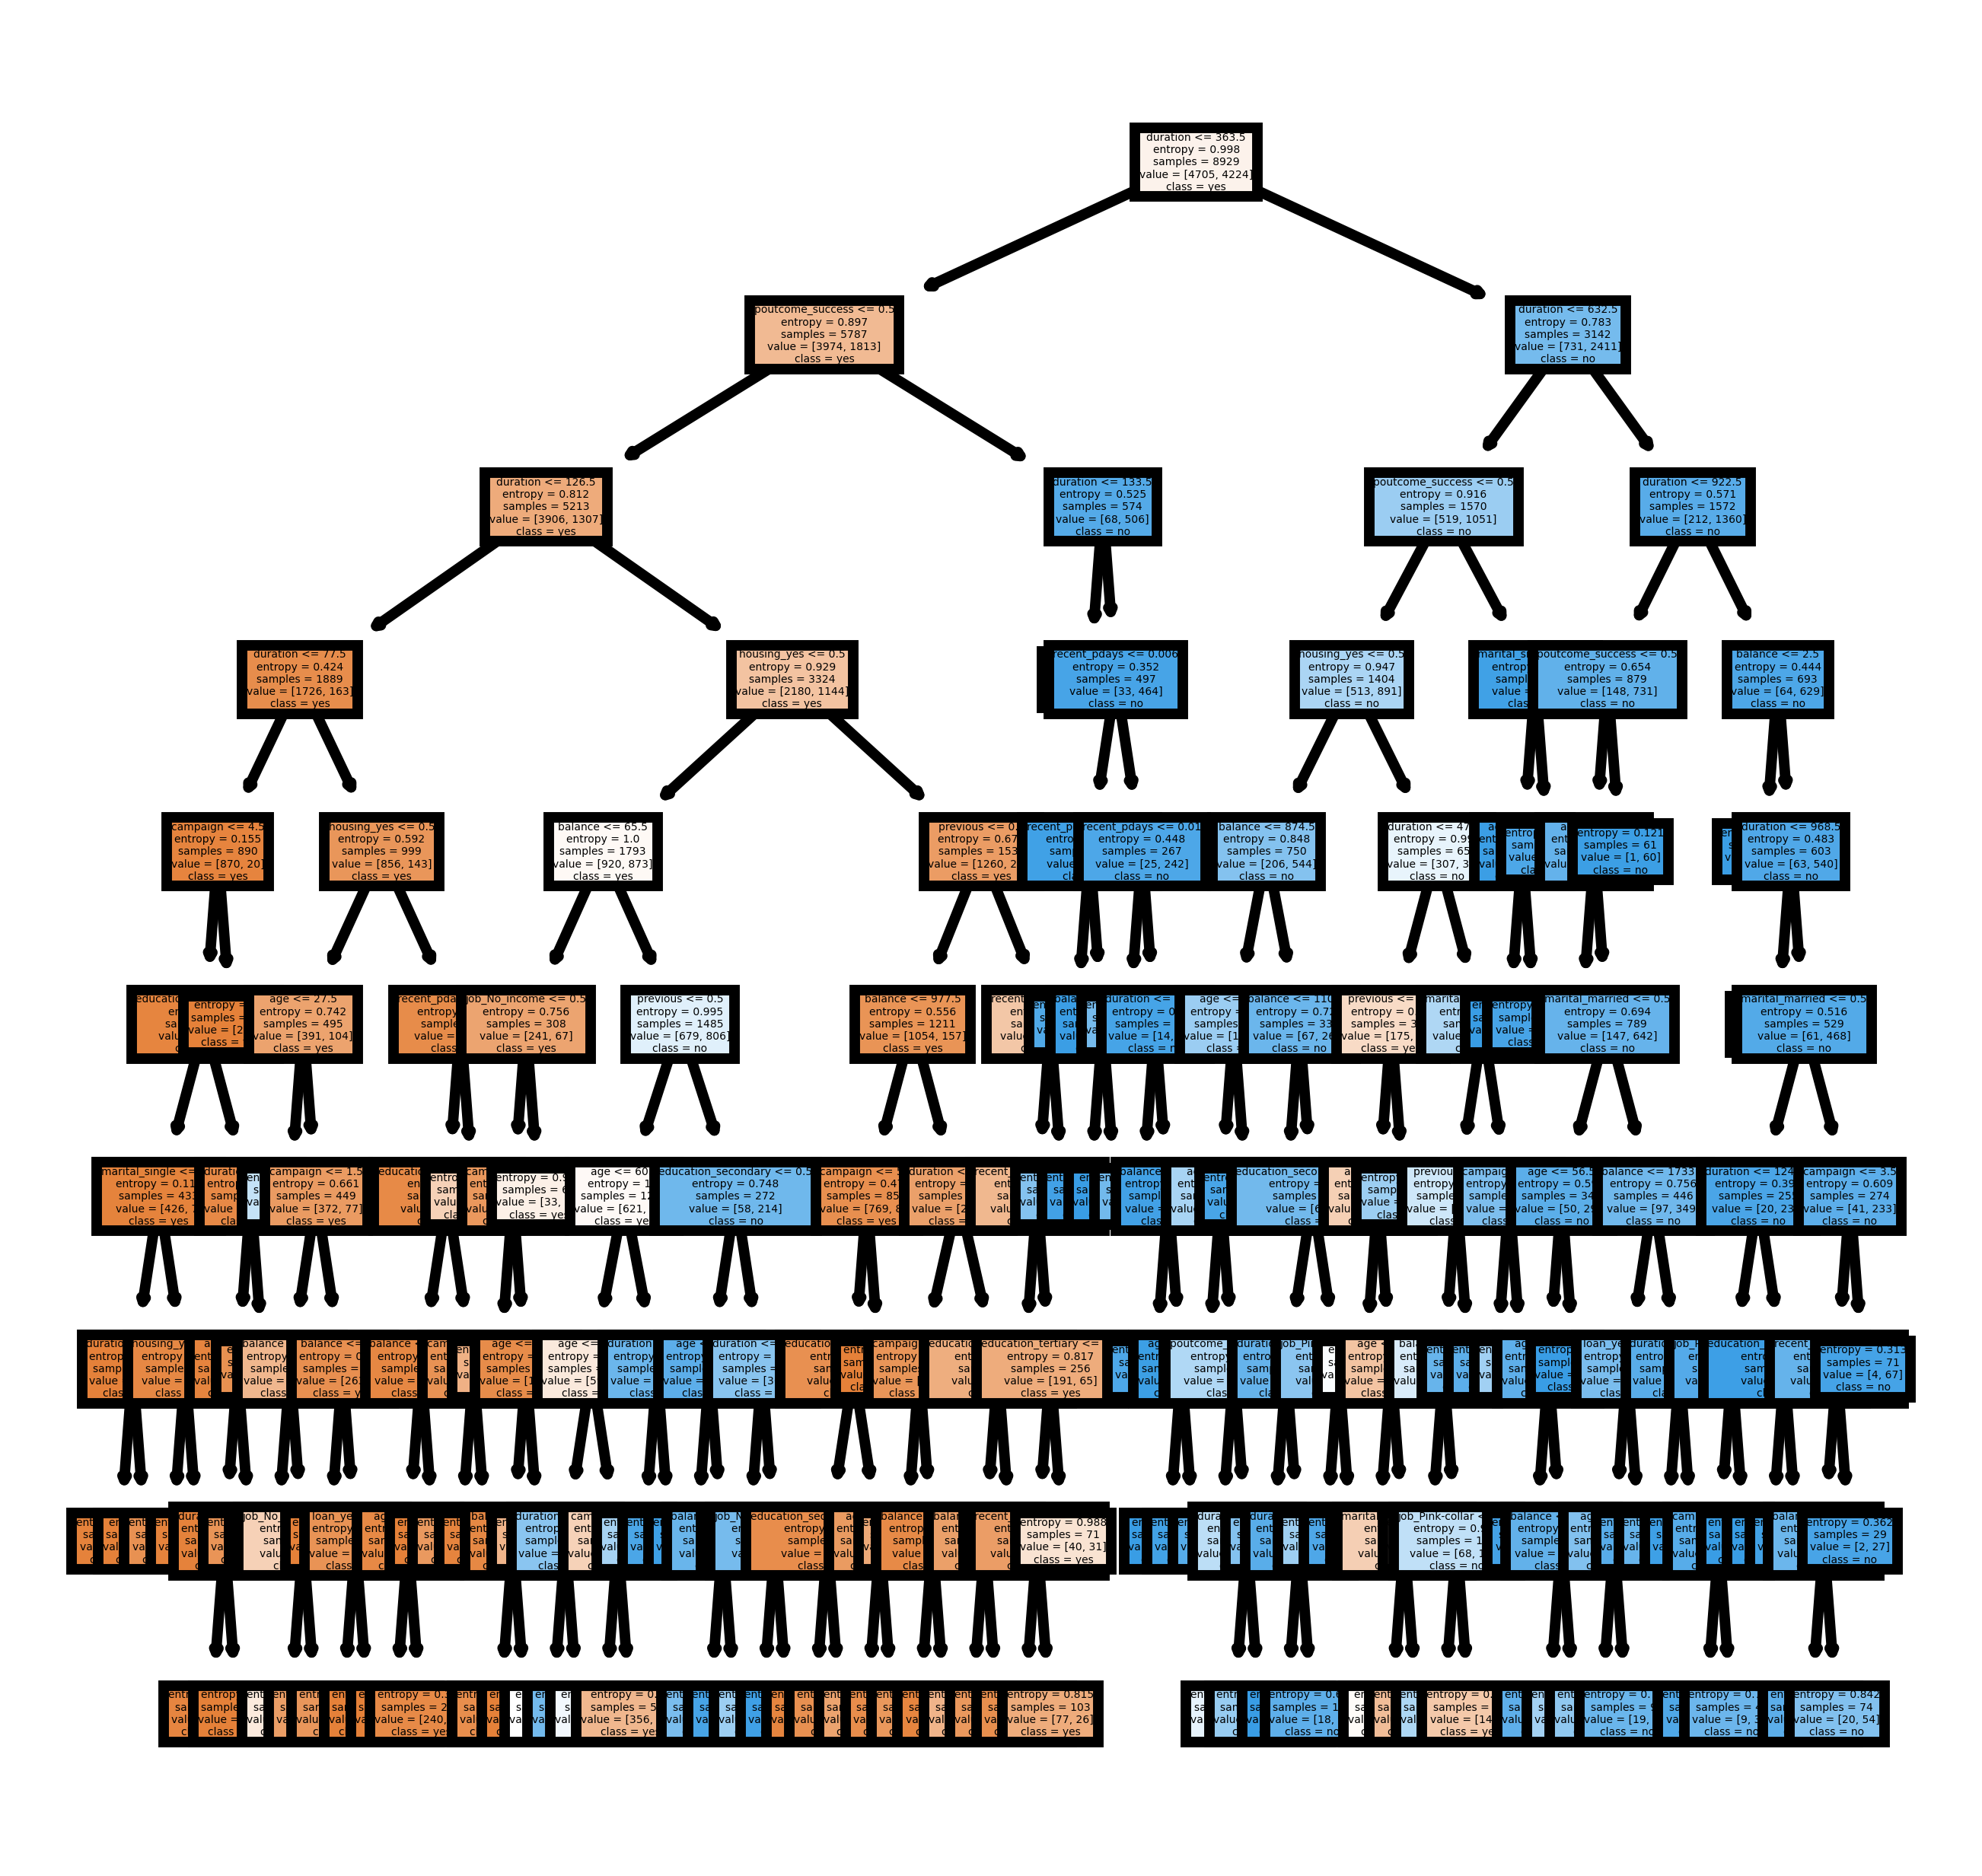

In [415]:
from sklearn.tree import plot_tree
from sklearn import tree
fn=X_train.columns
cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)

plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);


#The variable duration comes on the top,so it is the most important variable
#Some tree squares are hidden, this means that either the min sample split is less than that specified in the criterion or max split leaf
#

In [416]:
rules=tree.export_text(dt1,feature_names=X_train.columns.to_list())

In [417]:
print(rules)

|--- duration <= 363.50
|   |--- poutcome_success <= 0.50
|   |   |--- duration <= 139.50
|   |   |   |--- duration <= 77.50
|   |   |   |   |--- age <= 70.00
|   |   |   |   |   |--- marital_married <= 0.50
|   |   |   |   |   |   |--- duration <= 62.50
|   |   |   |   |   |   |   |--- balance <= 10300.50
|   |   |   |   |   |   |   |   |--- age <= 23.50
|   |   |   |   |   |   |   |   |   |--- balance <= 627.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- balance >  627.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- age >  23.50
|   |   |   |   |   |   |   |   |   |--- age <= 57.50
|   |   |   |   |   |   |   |   |   |   |--- campaign <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- campaign >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- age >  57.50

In [418]:
#Grid Search Method-

In [419]:
from sklearn.model_selection import GridSearchCV

In [420]:

parameters={"criterion":("gini","entropy"),"min_samples_split":[2,3,4,5],
           "max_depth":[2,4,6,8,9,10,11,12],
           "min_samples_leaf":[2,5,10]
           
           }
tr=DecisionTreeClassifier()
gsearch=GridSearchCV(tr,parameters,cv=10,verbose=1,n_jobs=-1)
gsearch.fit(X_train,y_train)


Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   32.5s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [421]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [422]:
gsearch.best_score_

0.7953863884020709

In [476]:
dt2=DecisionTreeClassifier(max_depth=8,criterion="entropy",min_samples_split=2,min_samples_leaf=5)
dt2.fit(X_train,y_train)
print("Train score:",dt2.score(X_train,y_train))
print("Train score:",dt2.score(X_test,y_test))

Train score: 0.8198006495688207
Train score: 0.812807881773399


In [477]:
print("Train score:",gsearch.score(X_train,y_train))
print("Test score:",gsearch.score(X_test,y_test))

Train score: 0.8198006495688207
Test score: 0.812807881773399


In [425]:
#categories for prediction
#accuracy,recall,precision,F1 score, predicted class
#AUC,ROC,GAIN,Lift,KS value
#variable selection-which variables and which are not

## Important feature selection

In [426]:
#Important variables
#helps in important variable selection(highest value means high importance)

Select those features automatically which contribute to your dependent variable or which impact your dependent variable the most.

Perfect solution to curb the problem of overfitting, and also help in redcign the training time since fewer variables means less complexity of the model.

In [478]:
dt2.feature_importances_

array([5.16570506e-02, 5.49393523e-02, 5.08864361e-01, 2.16622575e-02,
       2.16796405e-02, 3.81081571e-02, 0.00000000e+00, 3.14836747e-04,
       7.53597208e-03, 2.69849603e-03, 3.06492645e-03, 6.98793846e-03,
       0.00000000e+00, 1.84266207e-03, 1.86921412e-01, 1.47467255e-03,
       6.03598377e-03, 9.60203019e-04, 8.52520779e-02, 0.00000000e+00])

In [479]:
{"Columns":X_train.columns,"imp":dt2.feature_importances_}

{'Columns': Index(['balance', 'age', 'duration', 'campaign', 'previous', 'recent_pdays',
        'job_Independant', 'job_Management', 'job_No_income', 'job_Pink-collar',
        'marital_married', 'marital_single', 'default_yes', 'poutcome_other',
        'poutcome_success', 'education_secondary', 'education_tertiary',
        'education_unknown', 'housing_yes', 'loan_yes'],
       dtype='object'),
 'imp': array([5.16570506e-02, 5.49393523e-02, 5.08864361e-01, 2.16622575e-02,
        2.16796405e-02, 3.81081571e-02, 0.00000000e+00, 3.14836747e-04,
        7.53597208e-03, 2.69849603e-03, 3.06492645e-03, 6.98793846e-03,
        0.00000000e+00, 1.84266207e-03, 1.86921412e-01, 1.47467255e-03,
        6.03598377e-03, 9.60203019e-04, 8.52520779e-02, 0.00000000e+00])}

In [480]:
pd.DataFrame({"Columns":X_train.columns,"imp":dt2.feature_importances_})

,Columns,imp
0,balance,0.051657
1,age,0.054939
2,duration,0.508864
3,campaign,0.021662
4,previous,0.021680
5,recent_pdays,0.038108
6,job_Independant,0.000000
7,job_Management,0.000315
8,job_No_income,0.007536
9,job_Pink-collar,0.002698


In [481]:
imp=pd.DataFrame({"columns": X_train.columns, "importance":dt2.feature_importances_}).sort_values(by="importance", ascending=False)
imp

,columns,importance
2,duration,0.508864
14,poutcome_success,0.186921
18,housing_yes,0.085252
1,age,0.054939
0,balance,0.051657
5,recent_pdays,0.038108
4,previous,0.021680
3,campaign,0.021662
8,job_No_income,0.007536
11,marital_single,0.006988


In [482]:
imp.to_csv("imp.csv")

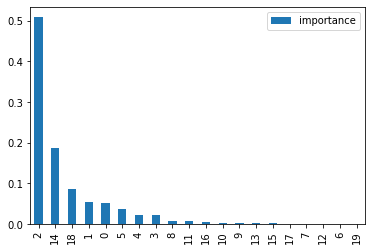

In [483]:
pd.DataFrame({"columns": X_train.columns, "importance":dt2.feature_importances_}).sort_values(by="importance", ascending=False).plot(kind="bar")

According to this graph, column number 2 i.e. duration is the most important variable impacting the dependent variable which is deposit the most.

In [433]:
#columns=X_train.columns
#imp=dt2.feature_importances_
#plt.figure(figsize=(20,20)).sort_values(ascending="False")
#plt.bar(columns,imp,color="red")
#plt.show()


Using all the important variables found in the feature selection and then combining them to form our new X train and test values.

In [484]:
X_train1=X_train[["duration","poutcome_success","housing_yes","recent_pdays","age","balance","campaign","job_No_income","marital_single","education_tertiary","job_Pink-collar"]]
X_test1=X_test[["duration","poutcome_success","housing_yes","recent_pdays","age","balance","campaign","job_No_income","marital_single","education_tertiary","job_Pink-collar"]]

In [485]:
dt3=DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=5, min_samples_leaf=5)   
dt3.fit(X_train1, y_train)
print("Train score:", dt3.score(X_train1, y_train))
print("Test score:", dt3.score(X_test1, y_test))

Train score: 0.820584611938627
Test score: 0.8114643976712942


Not much difference is observed in the scores after choosing the most important features which means that our model in the decision tree stands at an accuracy of 82 and 81%.

In [486]:
pred_train=dt3.predict(X_train1)

In [487]:
pred_test=dt3.predict(X_test1)

In [488]:
metrics.confusion_matrix(y_train,pred_train)

array([[3993,  712],
       [ 890, 3334]], dtype=int64)

In [489]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      4705
           1       0.82      0.79      0.81      4224

    accuracy                           0.82      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.82      0.82      0.82      8929



In [490]:
metrics.confusion_matrix(y_test, pred_test)

array([[991, 177],
       [244, 821]], dtype=int64)

In [491]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1168
           1       0.82      0.77      0.80      1065

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



### Model Evaluation

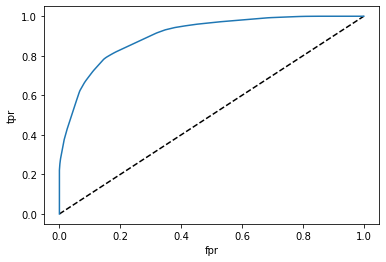

In [492]:
#ROC_Curve

probs=dt3.predict_proba(X_train1)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()



In [493]:
metrics.roc_auc_score(y_train,probs)

0.9017423839886646

### Confusion matrix with important feature values

In [494]:
pred_train=dt3.predict(X_train1)
pred_test=dt3.predict(X_test1)

In [495]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      4705
           1       0.82      0.79      0.81      4224

    accuracy                           0.82      8929
   macro avg       0.82      0.82      0.82      8929
weighted avg       0.82      0.82      0.82      8929



In [496]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1168
           1       0.82      0.77      0.80      1065

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



The important features when plotted in the confusion matrix show decent values of precision and recall.F1 score value is also good.

In [497]:
DT_Score = accuracy_score(y_test,pred_test)

## Random Forest

In [448]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=88)

In [449]:
from sklearn.ensemble import RandomForestClassifier

In [450]:
rf2=RandomForestClassifier()
rf2.fit(X_train,y_train)

RandomForestClassifier()

In [451]:
print("Train score",rf2.score(X_train,y_train))
print("Test score",rf2.score(X_test,y_test))

Train score 1.0
Test score 0.8208687863860278


In [452]:
#help(rf1)

In [453]:
rf3=RandomForestClassifier(n_estimators=200,random_state=88)
rf3.fit(X_train,y_train)
print("Train score",rf3.score(X_train,y_train))
print("Test score",rf3.score(X_test,y_test))
#by default, n_estimator is 100

Train score 1.0
Test score 0.8217644424540976


In [454]:
rf3=RandomForestClassifier(n_estimators=50,random_state=88,max_depth=8)
rf3.fit(X_train,y_train)
print("Train score",rf3.score(X_train,y_train))
print("Test score",rf3.score(X_test,y_test))
#by default, n_estimator is 100

Train score 0.8313360958673983
Test score 0.8293775190326914


In [455]:
rf4=RandomForestClassifier(n_estimators=400,random_state=88,max_depth=8)
rf4.fit(X_train,y_train)
print("Train score",rf4.score(X_train,y_train))
print("Test score",rf4.score(X_test,y_test))

#more trees the accuracy wont change

Train score 0.8331280098555269
Test score 0.8338557993730408


In [456]:
rf5=RandomForestClassifier(n_estimators=300,random_state=88,max_depth=8)
rf5.fit(X_train,y_train)
print("Train score",rf5.score(X_train,y_train))
print("Test score",rf5.score(X_test,y_test))

Train score 0.8326800313584948
Test score 0.8343036274070756


In [457]:
rf5=RandomForestClassifier(n_estimators=50,random_state=88,max_depth=8)
rf5.fit(X_train,y_train)
print("Train score",rf5.score(X_train,y_train))
print("Test score",rf5.score(X_test,y_test))

Train score 0.8313360958673983
Test score 0.8293775190326914


In [458]:
import time
st=time.time()

rf5=RandomForestClassifier(n_estimators=50,random_state=88)
rf5.fit(X_train,y_train)
print("Train score",rf5.score(X_train,y_train))
print("Test score",rf5.score(X_test,y_test))
et=time.time()
print("Total time",et-st)

Train score 0.9997760107514839
Test score 0.8181818181818182
Total time 1.2604897022247314


## Hyperparameter Tuning

In [459]:
parameters={"n_estimators":[50,100,150,200],
            "criterion":["gini", "entropy"],
            "max_depth":[5,7,9,11,15],
#             "min_samples_leaf" :[2,4,6,10],
#             "min_samples_split" :[2,4,6,10],
            "max_features":["log" , "sqrt"],
            "bootstrap" :[True , False]
           }
rf = RandomForestClassifier()
rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=1,n_jobs=-1,cv=10)
rf_gs.fit(X_train,y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:  5.9min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11, 15],
                         'max_features': ['log', 'sqrt'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [460]:
rf_gs.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [461]:
import time
st=time.time()

rf5=RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=11,max_features="sqrt")
rf5.fit(X_train,y_train)
print("Train score",rf5.score(X_train,y_train))
print("Test score",rf5.score(X_test,y_test))
et=time.time()
print("Total time",et-st)

Train score 0.8719901444730653
Test score 0.8293775190326914
Total time 0.9743843078613281


In [462]:
#After fitting in the best parameters
import time

st=time.time()

rf6=RandomForestClassifier(n_estimators=150,random_state=88,max_depth=9)

rf6.fit(X_train,y_train)
print("Train score",rf6.score(X_train,y_train))
print("Test score",rf6.score(X_test,y_test))

et=time.time()
print("Total time",et-st)

Train score 0.8453354238996528
Test score 0.8320644872369011
Total time 2.548572301864624


In [463]:
pred_train=rf6.predict(X_train)
pred_test=rf6.predict(X_test)

In [464]:
metrics.confusion_matrix(y_train,pred_train)

array([[3981,  724],
       [ 657, 3567]], dtype=int64)

In [465]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4705
           1       0.83      0.84      0.84      4224

    accuracy                           0.85      8929
   macro avg       0.84      0.85      0.85      8929
weighted avg       0.85      0.85      0.85      8929



In [466]:
metrics.confusion_matrix(y_test,pred_test)

array([[980, 188],
       [187, 878]], dtype=int64)

In [467]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1168
           1       0.82      0.82      0.82      1065

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [468]:
from sklearn.metrics import accuracy_score

In [469]:
RF_Score = accuracy_score(y_test,pred_test)

In [470]:
imp1=pd.DataFrame({"columns": X_train.columns, "importance":rf6.feature_importances_}).sort_values(by="importance", ascending=False)
imp1

,columns,importance
2,duration,0.512265
14,poutcome_success,0.078400
1,age,0.065727
5,recent_pdays,0.063746
0,balance,0.057364
18,housing_yes,0.055127
4,previous,0.038661
3,campaign,0.028339
13,poutcome_other,0.025772
8,job_No_income,0.014843


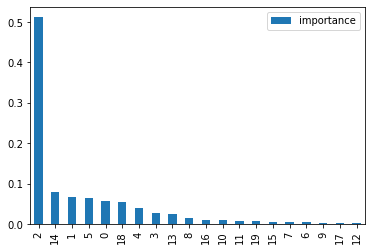

In [471]:
pd.DataFrame({"columns": X_train.columns, "importance":rf6.feature_importances_}).sort_values(by="importance", ascending=False).plot(kind="bar")

In [472]:
#AUC,ROC,Recall,Precision,F1 Score etc

In [473]:
#p Prob Score

In [498]:
Results = pd.DataFrame({'Model': ['Decision Tree','Random Forest'],
                        'Accuracy Score' : [DT_Score,RF_Score]})

In [499]:
Final_Results = Results.sort_values(by = 'Accuracy Score', ascending=False)
Final_Results = Final_Results.set_index('Model')
print(Final_Results)

               Accuracy Score
Model                        
Random Forest        0.832064
Decision Tree        0.811464


We conclude that:
    
    1.Both decision tree and random forest show the same level of accuracy with a minute difference but still we 
    we would choose random forest over decision tree as the former reduces the problem of overfitting.
    
    2.Variables like duration,poutcome_success are the most important variables commonly observed in both feature selection          graphs of both models.
    

#rf3.predict()
#rf3.predict_proba()